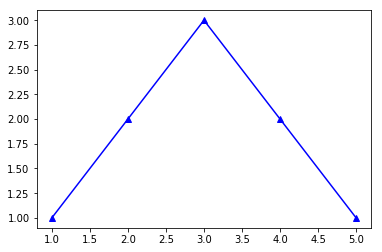

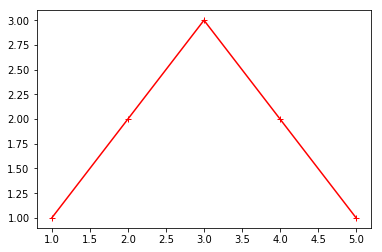

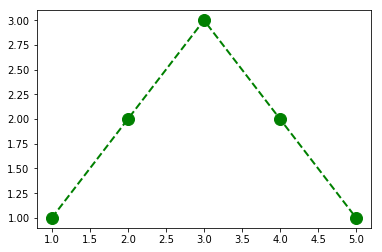

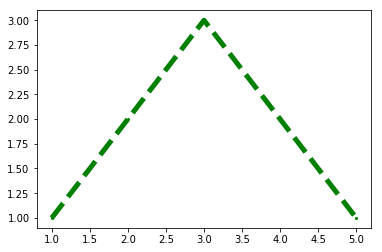

In [43]:
import matplotlib.pyplot as plt
import numpy as np
y = [1,2,3,2,1]
x = [1,2,3,4,5]
plt.plot(x,y,'-b^')
plt.show()
plt.plot(x,y,'-r+')
plt.show()
plt.plot(x,y,'go--',linewidth=2, markersize=12)
plt.show()
plt.plot(x, y, color='green', marker='o', linestyle='dashed',linewidth=5, markersize=2)
plt.show()

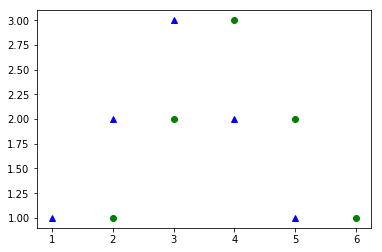

In [44]:
plt.plot(x,y,'bo',marker='^')
x = [2,3,4,5,6]
plt.plot(x,y,'go')

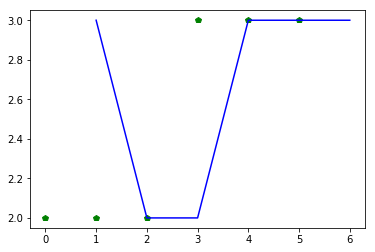

In [48]:
x1 = [0,1,2,3,4,5]
x2 = [1,2,3,4,5,6]
y1 =  [2,2,2,3,3,3]
y2 = [3,2,2,3,3,3]

plt.plot(x1,y1,'gp',x2,y2,'b-')
plt.show()

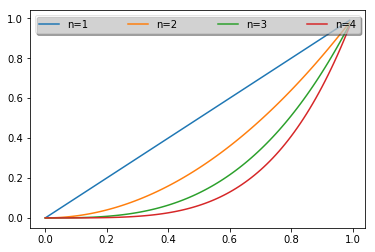

In [66]:
import matplotlib.pyplot as plt
import numpy as np


ax = plt.subplot(111)
t1 = np.arange(0.0, 1.0, 0.01)
for n in [1, 2, 3, 4]:
    plt.plot(t1, t1**n, label="n=%d"%(n,))

leg = plt.legend(loc='best', ncol=4, mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)


plt.show()

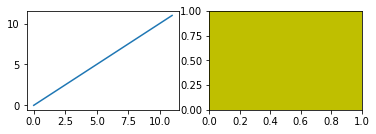

In [81]:
import matplotlib.pyplot as plt
# plot a line, implicitly creating a subplot(111)
plt.plot([1,2,3])
# now create a subplot which represents the top plot of a grid
# with 2 rows and 1 column. Since this subplot will overlap the
# first, the plot (and its axes) previously created, will be removed
plt.subplot(221)
plt.plot(range(12))
plt.subplot(222, facecolor='y') # creates 2nd subplot with yellow background

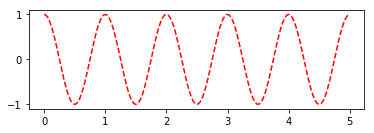

In [80]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

#plt.figure(2)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'r')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

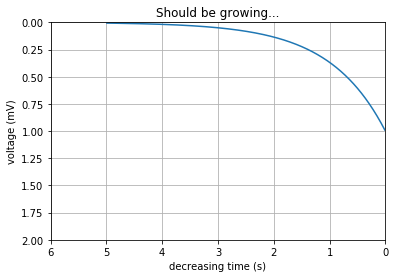

In [88]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.01, 5.0, 0.01)
s = np.exp(-t)
plt.plot(t, s)

plt.xlim(6, 0)  # decreasing time
plt.ylim(2,0)
plt.xlabel('decreasing time (s)')
plt.ylabel('voltage (mV)')
plt.title('Should be growing...')
plt.grid(True)

plt.show()


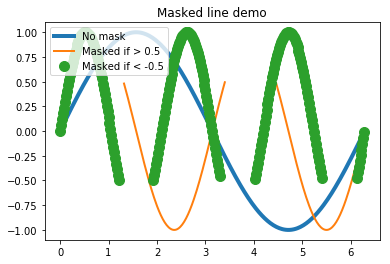

In [99]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 2*np.pi, 0.02)
y = np.sin(x)
y1 = np.sin(2*x)
y2 = np.sin(3*x)
ym1 = np.ma.masked_where(y1 > 0.5, y1)
ym2 = np.ma.masked_where(y2 < -0.5, y2)
plt.subplot(111)
lines = plt.plot(x, y, x, ym1, x, ym2, 'o')
plt.setp(lines[0], linewidth=4)
plt.setp(lines[1], linewidth=2)
plt.setp(lines[2], markersize=10)

plt.legend(('No mask', 'Masked if > 0.5', 'Masked if < -0.5'),
           loc='upper left')
plt.title('Masked line demo')
plt.show()

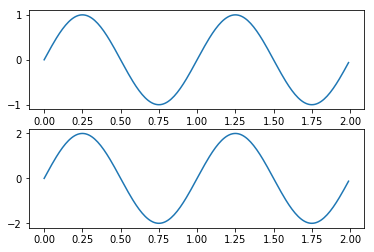

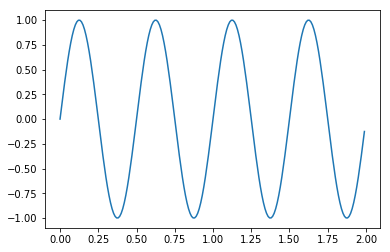

In [105]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 2.0, 0.01)
s1 = np.sin(2*np.pi*t)
s2 = np.sin(4*np.pi*t)

plt.figure(1)
plt.subplot(211)
plt.plot(t, s1)
plt.subplot(212)
plt.plot(t, 2*s1)

plt.figure(2)
plt.plot(t, s2)
#
#plt.figure(1)
#plt.subplot(211)
#plt.plot(t, s2, 's')
#ax = plt.gca()
#ax.set_xticklabels([])
#
plt.show()

/home/tsachanowski/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """
/home/tsachanowski/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


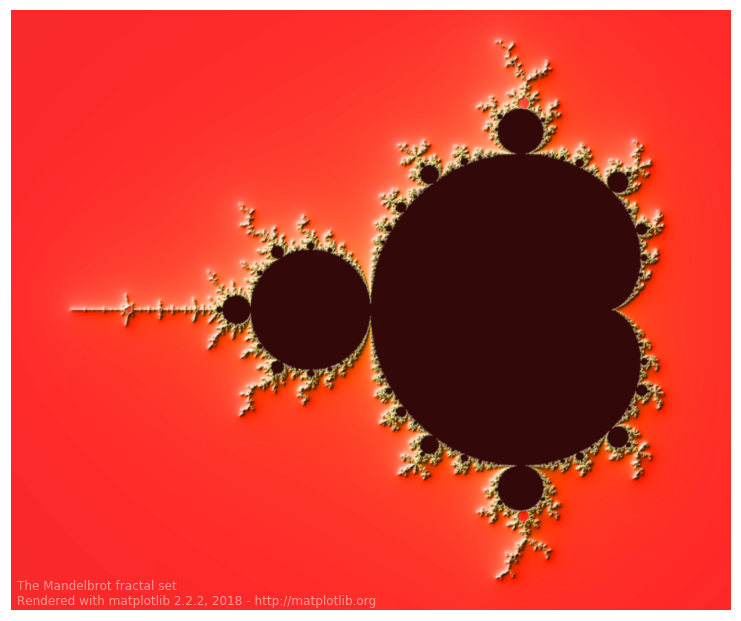

In [106]:
import numpy as np


def mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon=2.0):
    X = np.linspace(xmin, xmax, xn).astype(np.float32)
    Y = np.linspace(ymin, ymax, yn).astype(np.float32)
    C = X + Y[:, None] * 1j
    N = np.zeros_like(C, dtype=int)
    Z = np.zeros_like(C)
    for n in range(maxiter):
        I = np.less(abs(Z), horizon)
        N[I] = n
        Z[I] = Z[I]**2 + C[I]
    N[N == maxiter-1] = 0
    return Z, N


if __name__ == '__main__':
    import time
    import matplotlib
    from matplotlib import colors
    import matplotlib.pyplot as plt

    xmin, xmax, xn = -2.25, +0.75, 3000/2
    ymin, ymax, yn = -1.25, +1.25, 2500/2
    maxiter = 200
    horizon = 2.0 ** 40
    log_horizon = np.log(np.log(horizon))/np.log(2)
    Z, N = mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon)

    # Normalized recount as explained in:
    # https://linas.org/art-gallery/escape/smooth.html
    # https://www.ibm.com/developerworks/community/blogs/jfp/entry/My_Christmas_Gift

    # This line will generate warnings for null values but it is faster to
    # process them afterwards using the nan_to_num
    with np.errstate(invalid='ignore'):
        M = np.nan_to_num(N + 1 -
                          np.log(np.log(abs(Z)))/np.log(2) +
                          log_horizon)

    dpi = 72
    width = 10
    height = 10*yn/xn
    fig = plt.figure(figsize=(width, height), dpi=dpi)
    ax = fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False, aspect=1)

    # Shaded rendering
    light = colors.LightSource(azdeg=315, altdeg=10)
    M = light.shade(M, cmap=plt.cm.hot, vert_exag=1.5,
                    norm=colors.PowerNorm(0.3), blend_mode='hsv')
    plt.imshow(M, extent=[xmin, xmax, ymin, ymax], interpolation="bicubic")
    ax.set_xticks([])
    ax.set_yticks([])

    # Some advertisement for matplotlib
    year = time.strftime("%Y")
    text = ("The Mandelbrot fractal set\n"
            "Rendered with matplotlib %s, %s - http://matplotlib.org"
            % (matplotlib.__version__, year))
    ax.text(xmin+.025, ymin+.025, text, color="white", fontsize=12, alpha=0.5)

    plt.show()
